# Q. 1: Getting Started with Python for Data Manipulation
1. Install Anaconda or Jupyter Notebook.
2. Import basic libraries: numpy, pandas, matplotlib, seaborn.
3. Create a simple Python list, tuple, dictionary, and convert them into Pandas Series and
DataFrame.
4. Load a small dataset (CSV/Excel file, e.g., students.csv containing ID, Name, Age, Course,
Marks).
o Display first 5 and last 5 rows.
o Get number of rows, columns, and column names.

In [2]:
import pandas as pd

In [3]:
df1=pd.read_csv('app_usage.csv')

In [4]:
df2=pd.read_csv('online_courses.csv')

In [5]:
df3=pd.read_csv('software_projects.csv')

In [6]:
df4=pd.read_csv('students.csv')

In [7]:
df1.head(5),df2.head(5),df3.head(5),df4.head(5)

(   UserID      AppName       Category  UsageTime_Min  Rating
 0     101         Zoom  Communication          120.0     4.5
 1     102        Teams  Communication           90.0     4.0
 2     103  Google Meet  Communication           60.0     3.8
 3     104        Slack   Productivity           80.0     4.2
 4     105       Notion   Productivity          100.0     4.7,
    StudentID     Name              Course Enrollment_Date  Marks
 0          1    Alice  Python Programming      2024-01-31     85
 1          2      Bob        Data Science      2024-02-29     88
 2          3  Charlie     Web Development      2024-03-31     75
 3          4    David  Python Programming      2024-04-30     92
 4          5      Eva      Cyber Security      2024-05-31     65,
    ProjectID    Language  TeamSize  Duration_Months  BugsReported
 0          1      Python         5                6            50
 1          2        Java         8               12            80
 2          3         C++    

In [8]:
df1.shape,df2.shape,df3.shape,df4.shape

((10, 5), (10, 5), (10, 5), (10, 5))

# Q.2: Data Cleaning and Wrangling with Pandas
Dataset: students.csv or online_courses.csv
1. Handle missing values:
o Check null values.
o Replace missing values in Marks with mean.
o Drop rows where Course is missing.
2. Handle duplicates:
o Detect and remove duplicate records.
3. Data Transformation:
o Convert Course column values into lowercase.
o Create a new column Result = "Pass" if Marks ≥ 40 else "Fail".
o Convert Age column to integer type.

In [10]:
import pandas as pd

# Load the students.csv dataset
df = pd.read_csv('students.csv')

# 1. Handle missing values
# a. Check null values
print("Null values in each column:")
print(df.isnull().sum())

# b. Replace missing values in Marks with mean
df['Marks'] = df['Marks'].fillna(df['Marks'].mean())

# c. Drop rows where Course is missing
df = df.dropna(subset=['Course'])

# 2. Handle duplicates
# a. Detect duplicates
print("\nNumber of duplicate rows:", df.duplicated().sum())

# b. Remove duplicate records
df = df.drop_duplicates()

# 3. Data Transformation
# a. Convert Course column values to lowercase
df['Course'] = df['Course'].str.lower()

# b. Create a new column Result = "Pass" if Marks ≥ 40 else "Fail"
df['Result'] = df['Marks'].apply(lambda x: 'Pass' if x >= 40 else 'Fail')

# c. Convert Age column to integer type (handle missing Age by filling with mean, then convert)
df['Age'] = df['Age'].fillna(df['Age'].mean()).astype(int)

# Display the cleaned and transformed dataset
print("\nCleaned and transformed dataset:")
print(df)

# Optionally, save the cleaned dataset to a new CSV file
df.to_csv('cleaned_students.csv', index=False)

Null values in each column:
ID        0
Name      0
Age       1
Course    1
Marks     1
dtype: int64

Number of duplicate rows: 0

Cleaned and transformed dataset:
   ID     Name  Age  Course      Marks Result
0   1    Alice   20  python  85.000000   Pass
1   2      Bob   22    java  72.000000   Pass
2   3  Charlie   21  python  90.000000   Pass
3   4    David   23     c++  60.000000   Pass
4   5      Eva   22    java  45.000000   Pass
5   6    Frank   21  python  30.000000   Fail
7   8    Helen   24  python  95.000000   Pass
8   9      Ian   22     c++  63.555556   Pass
9  10     Jane   20    java  40.000000   Pass


# Q. 3: Data Filtering and Transformation
Dataset: online_courses.csv or software_usage.csv
1. Select specific columns (Name, Marks).
2. Filter students with Marks > 75.
3. Show only students enrolled in "Python Programming".
4. Sort dataset by Marks (descending).
5. Group data by Course and calculate average Marks.
6. Apply lambda function to create a new column "Grade" based on Marks (A, B, C, Fail).

In [12]:
import pandas as pd

# Load the online_courses.csv dataset
df = pd.read_csv('online_courses.csv')

# 1. Select specific columns (Name, Marks)
df_selected = df[['Name', 'Marks']]

# 2. Filter students with Marks > 75
df_high_marks = df_selected[df_selected['Marks'] > 75]

# 3. Filter students enrolled in "Python Programming"
df_python = df[df['Course'] == 'Python Programming'][['Name', 'Marks']]

# 4. Sort dataset by Marks (descending)
df_sorted = df.sort_values(by='Marks', ascending=False)

# 5. Group data by Course and calculate average Marks
df_grouped = df.groupby('Course')['Marks'].mean().reset_index()

# 6. Apply lambda function to create a new column "Grade" based on Marks
# Grading logic: A (Marks >= 90), B (Marks >= 80), C (Marks >= 70), Fail (Marks < 70)
df['Grade'] = df['Marks'].apply(lambda x: 'A' if x >= 90 else 'B' if x >= 80 else 'C' if x >= 70 else 'Fail')

# Display results
print("1. Selected columns (Name, Marks):")
print(df_selected)
print("\n2. Students with Marks > 75:")
print(df_high_marks)
print("\n3. Students in Python Programming:")
print(df_python)
print("\n4. Dataset sorted by Marks (descending):")
print(df_sorted)
print("\n5. Average Marks by Course:")
print(df_grouped)
print("\n6. Dataset with Grade column:")
print(df)

# Optionally, save the transformed dataset
df.to_csv('transformed_online_courses.csv', index=False)

1. Selected columns (Name, Marks):
      Name  Marks
0    Alice     85
1      Bob     88
2  Charlie     75
3    David     92
4      Eva     65
5    Frank     55
6    Grace     70
7    Helen     95
8      Ian     60
9     Jane     80

2. Students with Marks > 75:
    Name  Marks
0  Alice     85
1    Bob     88
3  David     92
7  Helen     95
9   Jane     80

3. Students in Python Programming:
    Name  Marks
0  Alice     85
3  David     92
7  Helen     95

4. Dataset sorted by Marks (descending):
   StudentID     Name              Course Enrollment_Date  Marks
7          8    Helen  Python Programming      2024-08-31     95
3          4    David  Python Programming      2024-04-30     92
1          2      Bob        Data Science      2024-02-29     88
0          1    Alice  Python Programming      2024-01-31     85
9         10     Jane        Data Science      2024-10-31     80
2          3  Charlie     Web Development      2024-03-31     75
6          7    Grace     Web Development   

# Q. 4: Exploratory Data Analysis (EDA) – Descriptive Statistics
Dataset: software_usage.csv or app_ratings.csv
1. Use .describe() to get mean, std, min, max, quartiles.
2. Find:
o Average age of students.
o Maximum and minimum marks.
o Most common course.
3. Value counts:
o Count number of students per course.

In [14]:
import pandas as pd

# Load the datasets
students_df = pd.read_csv('students.csv')
app_usage_df = pd.read_csv('app_usage.csv')

# 1. Use .describe() to get mean, std, min, max, quartiles for app_usage.csv
print("1. Descriptive Statistics for app_usage.csv:")
print(app_usage_df.describe())

# 2. Descriptive Statistics for students.csv
# a. Average age of students
avg_age = students_df['Age'].mean()

# b. Maximum and minimum marks
max_marks = students_df['Marks'].max()
min_marks = students_df['Marks'].min()

# c. Most common course
most_common_course = students_df['Course'].mode()[0]

# 3. Value counts: Number of students per course
course_counts = students_df['Course'].value_counts()

# Display results
print("\n2. Descriptive Statistics for students.csv:")
print(f"a. Average Age of Students: {avg_age:.2f}")
print(f"b. Maximum Marks: {max_marks}")
print(f"   Minimum Marks: {min_marks}")
print(f"c. Most Common Course: {most_common_course}")
print("\n3. Number of Students per Course:")
print(course_counts)


1. Descriptive Statistics for app_usage.csv:
          UserID  UsageTime_Min    Rating
count   10.00000       9.000000  9.000000
mean   105.50000     102.777778  4.244444
std      3.02765      47.507309  0.439065
min    101.00000      50.000000  3.500000
25%    103.25000      75.000000  4.000000
50%    105.50000      90.000000  4.200000
75%    107.75000     120.000000  4.600000
max    110.00000     200.000000  4.800000

2. Descriptive Statistics for students.csv:
a. Average Age of Students: 21.67
b. Maximum Marks: 95.0
   Minimum Marks: 30.0
c. Most Common Course: Python

3. Number of Students per Course:
Course
Python    4
Java      3
C++       2
Name: count, dtype: int64


# Q. 5: Data Visualization for EDA
Dataset: app_ratings.csv
1. Plot histogram of Marks or Ratings.
2. Plot bar chart for number of students enrolled per course.
3. Plot boxplot for distribution of marks.
4. Plot scatter plot between Age and Marks.
5. Use seaborn heatmap for correlation matrix of numerical features.

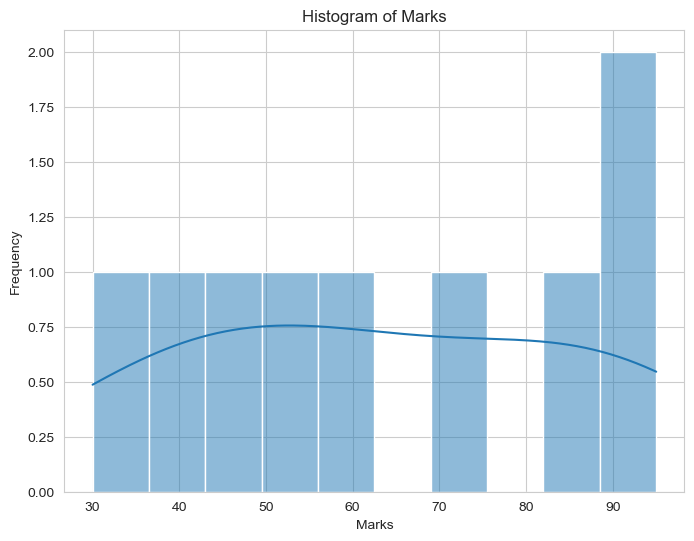

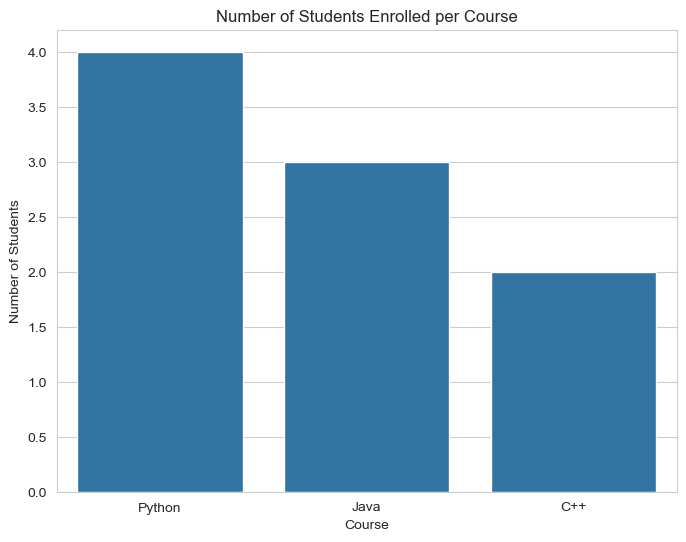

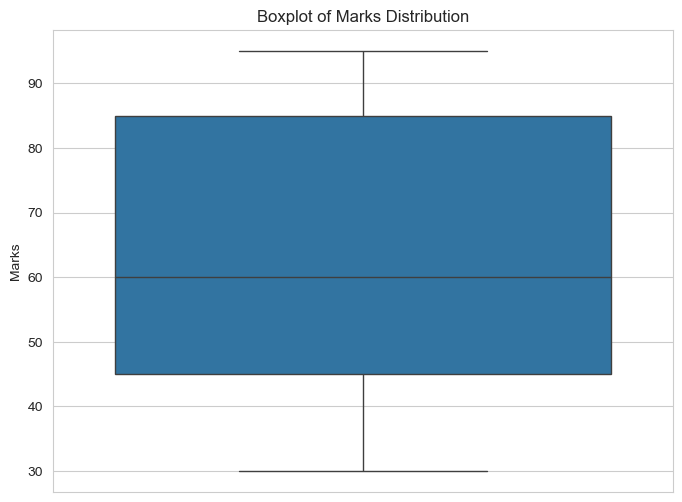

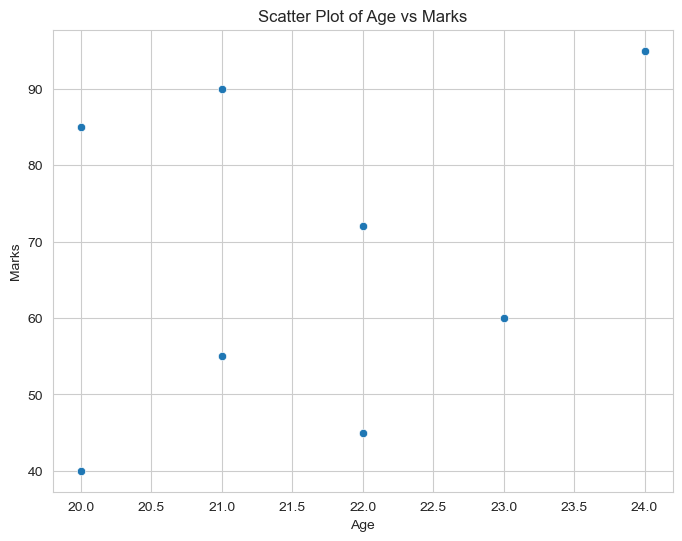

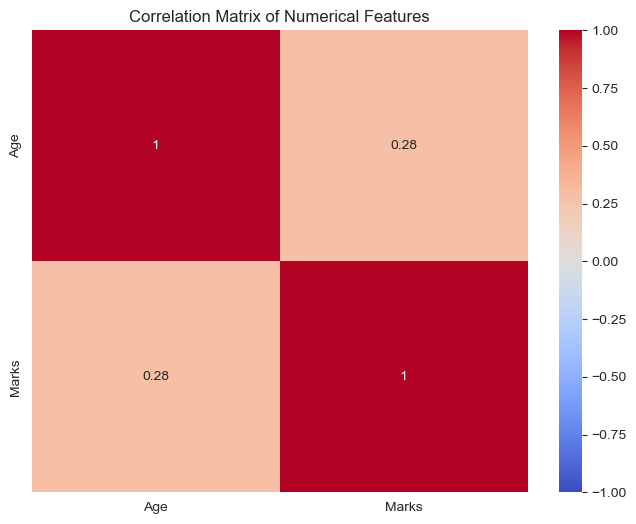

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the students.csv dataset
df = pd.read_csv('students.csv')

# Set up the plotting style
sns.set_style('whitegrid')

# 1. Plot histogram of Marks
plt.figure(figsize=(8, 6))
sns.histplot(df['Marks'], bins=10, kde=True)
plt.title('Histogram of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()


# 2. Plot bar chart for number of students enrolled per course
plt.figure(figsize=(8, 6))
sns.countplot(x='Course', data=df)
plt.title('Number of Students Enrolled per Course')
plt.xlabel('Course')
plt.ylabel('Number of Students')
plt.show()

# 3. Plot boxplot for distribution of Marks
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['Marks'])
plt.title('Boxplot of Marks Distribution')
plt.ylabel('Marks')
plt.show()

# 4. Plot scatter plot between Age and Marks
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Marks', data=df)
plt.title('Scatter Plot of Age vs Marks')
plt.xlabel('Age')
plt.ylabel('Marks')
plt.show()

# 5. Plot seaborn heatmap for correlation matrix of numerical features
numerical_df = df[['Age', 'Marks']]  # Select numerical columns
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()
